# About Dataset
## Description:

The "Daily Social Media Active Users" dataset provides a comprehensive and dynamic look into the digital presence and activity of global users across major social media platforms. The data was generated to simulate real-world usage patterns for 13 popular platforms, including Facebook, YouTube, WhatsApp, Instagram, WeChat, TikTok, Telegram, Snapchat, X (formerly Twitter), Pinterest, Reddit, Threads, LinkedIn, and Quora. This dataset contains 10,000 rows and includes several key fields that offer insights into user demographics, engagement, and usage habits.

## Dataset Breakdown:

Platform: The name of the social media platform where the user activity is tracked. It includes globally recognized platforms, such as Facebook, YouTube, and TikTok, that are known for their large, active user bases.

Owner: The company or entity that owns and operates the platform. Examples include Meta for Facebook, Instagram, and WhatsApp, Google for YouTube, and ByteDance for TikTok.

Primary Usage: This category identifies the primary function of each platform. Social media platforms differ in their primary usage, whether it's for social networking, messaging, multimedia sharing, professional networking, or more.

Country: The geographical region where the user is located. The dataset simulates global coverage, showcasing users from diverse locations and regions. It helps in understanding how user behavior varies across different countries.

Daily Time Spent (min): This field tracks how much time a user spends on a given platform on a daily basis, expressed in minutes. Time spent data is critical for understanding user engagement levels and the popularity of specific platforms.

Verified Account: Indicates whether the user has a verified account. This feature mimics real-world patterns where verified users (often public figures, businesses, or influencers) have enhanced status on social media platforms.

Date Joined: The date when the user registered or started using the platform. This data simulates user account history and can provide insights into user retention trends or platform growth over time.

Import Modules for Aanalysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read File and Information about it

In [2]:
df = pd.read_csv('Social Media Users.csv')
df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Platform                10000 non-null  object 
 1   Owner                   10000 non-null  object 
 2   Primary Usage           10000 non-null  object 
 3   Country                 10000 non-null  object 
 4   Daily Time Spent (min)  10000 non-null  float64
 5   Verified Account        10000 non-null  object 
 6   Date Joined             10000 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.0+ KB


(None,
     Platform      Owner                 Primary Usage           Country  \
 0   WhatsApp       Meta                     Messaging       Switzerland   
 1     WeChat    Tencent    Messaging and social media        Madagascar   
 2   Snapchat  Snap Inc.          Multimedia messaging  Pitcairn Islands   
 3  Instagram       Meta       Photo and video sharing       Timor-Leste   
 4    Threads       Meta  Text-based social networking           Bermuda   
 
    Daily Time Spent (min) Verified Account Date Joined  
 0                  113.94              Yes  2019-03-03  
 1                   49.63              Yes  2023-09-21  
 2                   29.01              Yes  2020-12-13  
 3                  295.43              Yes  2019-04-21  
 4                   71.78               No  2015-07-14  )

In [3]:
df.describe()

,Daily Time Spent (min)
count,10000.000000
mean,152.211145
std,85.142750
min,5.020000
25%,78.920000
50%,152.735000
75%,225.642500
max,300.000000


Checking Nulls or Duplicates and know unique values

In [4]:
print(df.isnull().sum())
print("-------------------------")
print(df.duplicated().sum())
print("-------------------------")
print(df['Platform'].unique(),df['Verified Account'].unique())

Platform                  0
Owner                     0
Primary Usage             0
Country                   0
Daily Time Spent (min)    0
Verified Account          0
Date Joined               0
dtype: int64
-------------------------
0
-------------------------
['WhatsApp' 'WeChat' 'Snapchat' 'Instagram' 'Threads'
 'X (formerly Twitter)' 'TikTok' 'Quora' 'Facebook' 'YouTube' 'Telegram'
 'Reddit' 'LinkedIn' 'Pinterest'] ['Yes' 'No']


Converting Date Joined column from object to datetime type

In [5]:
df['Date Joined']=pd.to_datetime(df['Date Joined'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Platform                10000 non-null  object        
 1   Owner                   10000 non-null  object        
 2   Primary Usage           10000 non-null  object        
 3   Country                 10000 non-null  object        
 4   Daily Time Spent (min)  10000 non-null  float64       
 5   Verified Account        10000 non-null  object        
 6   Date Joined             10000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 547.0+ KB


Split the Date Joined to (Join_month and Join_year Columns) and drop the Date Joined Column 

In [7]:
df['Join_Month']=df['Date Joined'].dt.month
df['Join_Year']=df['Date Joined'].dt.year
df.drop(columns=['Date Joined'],inplace=True)

EDA section

Average Daily Time Spent per Platform

In [8]:
platform_usage = df.groupby("Platform")['Daily Time Spent (min)'].mean().sort_values(ascending=False)

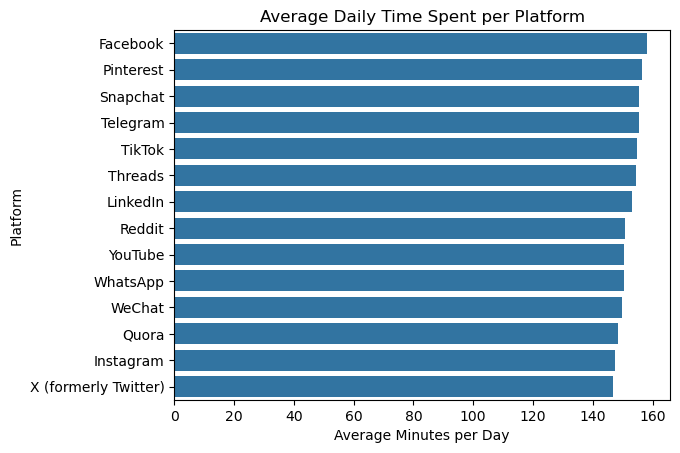

------------
The Top 10 platform by Average Daily Time Spent


Platform
Facebook     157.957348
Pinterest    156.384517
Snapchat     155.529886
Telegram     155.287385
TikTok       154.715712
Threads      154.505401
LinkedIn     153.102577
Reddit       150.841688
YouTube      150.419661
WhatsApp     150.347658
Name: Daily Time Spent (min), dtype: float64

In [9]:
sns.barplot(x=platform_usage.values,y=platform_usage.index)
plt.title("Average Daily Time Spent per Platform")
plt.xlabel("Average Minutes per Day")
plt.ylabel("Platform")
plt.show()
print("------------")
print("The Top 10 platform by Average Daily Time Spent")
platform_usage.head(10)


Top 15 Countries by Number of Users

C:\Users\Ahmed Eltras\AppData\Local\Temp\ipykernel_9588\2544791516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_users_count.values,y=country_users_count.index,palette="crest")


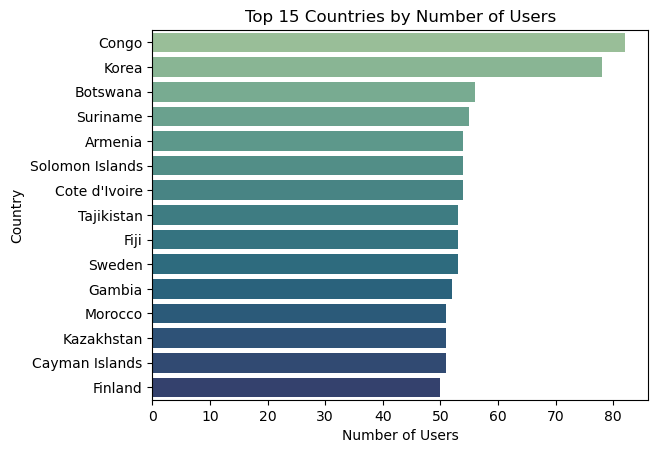

--------------------
Country
Congo              82
Korea              78
Botswana           56
Suriname           55
Armenia            54
Solomon Islands    54
Cote d'Ivoire      54
Tajikistan         53
Fiji               53
Sweden             53
Gambia             52
Morocco            51
Kazakhstan         51
Cayman Islands     51
Finland            50
Name: count, dtype: int64


In [10]:
country_users_count=df['Country'].value_counts().head(15)
sns.barplot(x=country_users_count.values,y=country_users_count.index,palette="crest")
plt.title("Top 15 Countries by Number of Users")
plt.xlabel("Number of Users")
plt.ylabel("Country")
plt.show()
print("--------------------")
print(country_users_count)

Average Daily Time by Primary Usage Type per Country

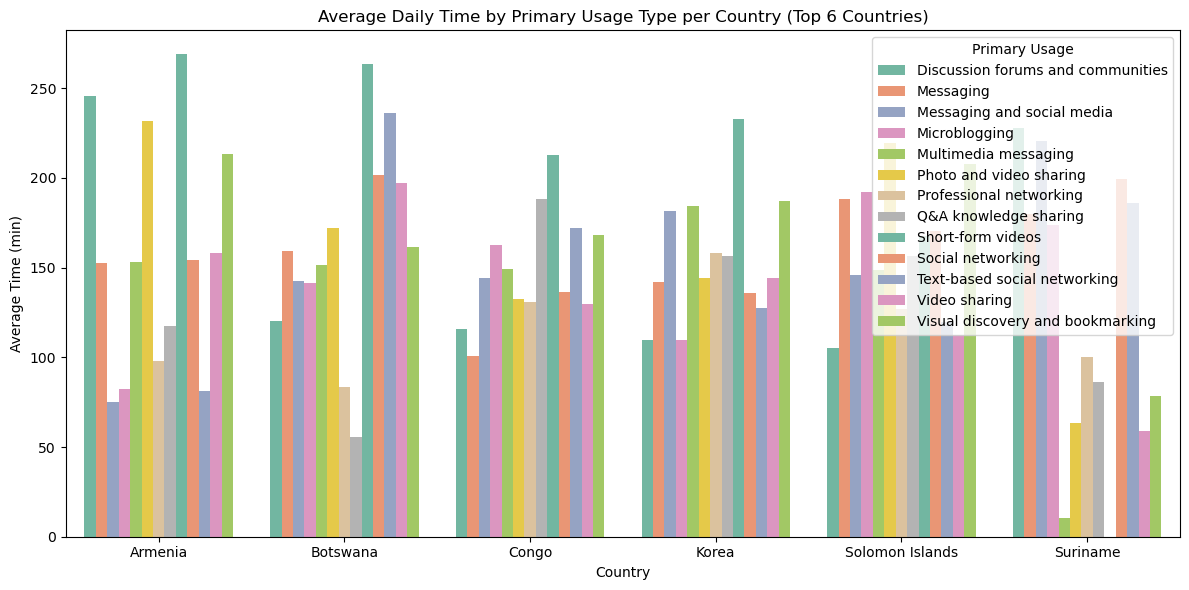

,Country,Primary Usage,Daily Time Spent (min)
134,Armenia,Short-form videos,268.800000
126,Armenia,Discussion forums and communities,245.808000
131,Armenia,Photo and video sharing,231.874000
138,Armenia,Visual discovery and bookmarking,213.428333
137,Armenia,Video sharing,158.036667
...,...,...,...
2558,Suriname,Q&A knowledge sharing,86.158333
2562,Suriname,Visual discovery and bookmarking,78.576000
2556,Suriname,Photo and video sharing,63.325000
2561,Suriname,Video sharing,58.870000


In [11]:
usage_by_country = df.groupby(["Country", "Primary Usage"])["Daily Time Spent (min)"].mean().reset_index()
top_countries = df["Country"].value_counts().head(6).index
filtered_usage = usage_by_country[usage_by_country["Country"].isin(top_countries)]
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_usage, x="Country", y="Daily Time Spent (min)", hue="Primary Usage", palette="Set2")
plt.title("Average Daily Time by Primary Usage Type per Country (Top 6 Countries)")
plt.xlabel("Country")
plt.ylabel("Average Time (min)")
plt.legend(title="Primary Usage")
plt.tight_layout()
plt.show()
filtered_usage.sort_values(["Country", "Daily Time Spent (min)"], ascending=[True, False])

Distribution of Daily Time Spent by Verification Status

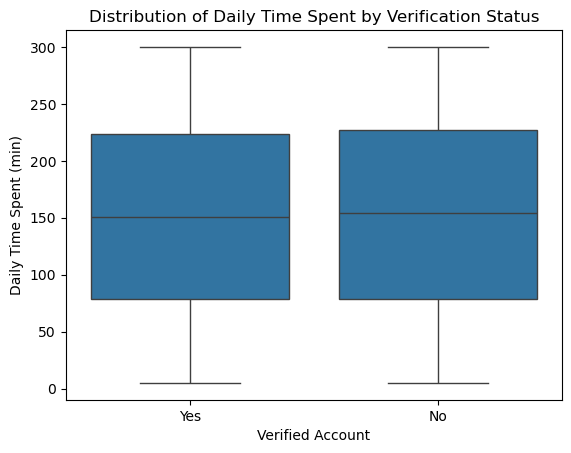

In [12]:
sns.boxplot(x="Verified Account", y="Daily Time Spent (min)", data=df)
plt.title("Distribution of Daily Time Spent by Verification Status")
plt.show()

Number of Users Joined Per Year

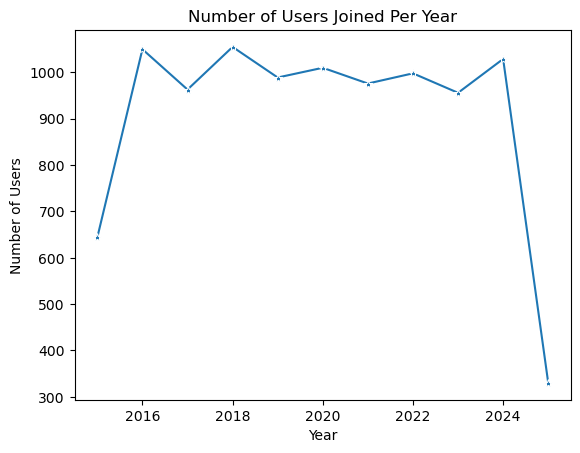

---------------------
Join_Year
2015     644
2016    1050
2017     963
2018    1055
2019     989
2020    1010
2021     976
2022     998
2023     956
2024    1029
2025     330
Name: count, dtype: int64


In [13]:
yearly_count=df['Join_Year'].value_counts().sort_index()
sns.lineplot(x=yearly_count.index,y=yearly_count.values,marker='*')
plt.title("Number of Users Joined Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Users")
plt.show()
print("---------------------")
print(yearly_count)

Average Daily Time Spent by Join Year

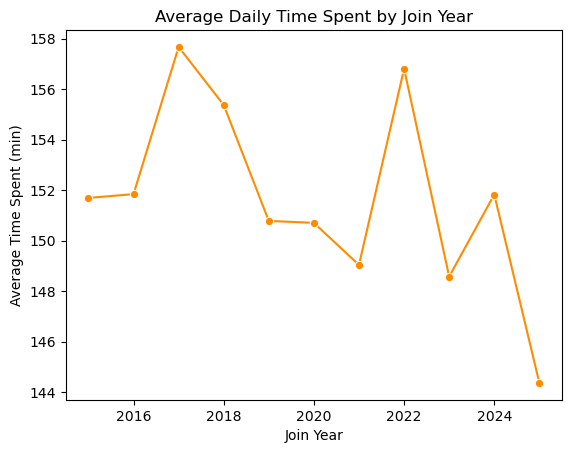

-----------------------------
Join_Year
2015    151.693432
2016    151.845533
2017    157.676407
2018    155.376550
2019    150.784146
2020    150.707465
2021    149.039949
2022    156.814339
2023    148.578075
2024    151.830097
2025    144.366242
Name: Daily Time Spent (min), dtype: float64


In [14]:
avg_time_by_year = df.groupby("Join_Year")["Daily Time Spent (min)"].mean().sort_index()
sns.lineplot(x=avg_time_by_year.index, y=avg_time_by_year.values, marker="o", color="darkorange")
plt.title("Average Daily Time Spent by Join Year")
plt.xlabel("Join Year")
plt.ylabel("Average Time Spent (min)")
plt.show()
print("-----------------------------")
print(avg_time_by_year)

Average Daily Time Spent by Primary Usage

C:\Users\Ahmed Eltras\AppData\Local\Temp\ipykernel_9588\47310459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=usage_avg_time.values, y=usage_avg_time.index, palette="viridis")


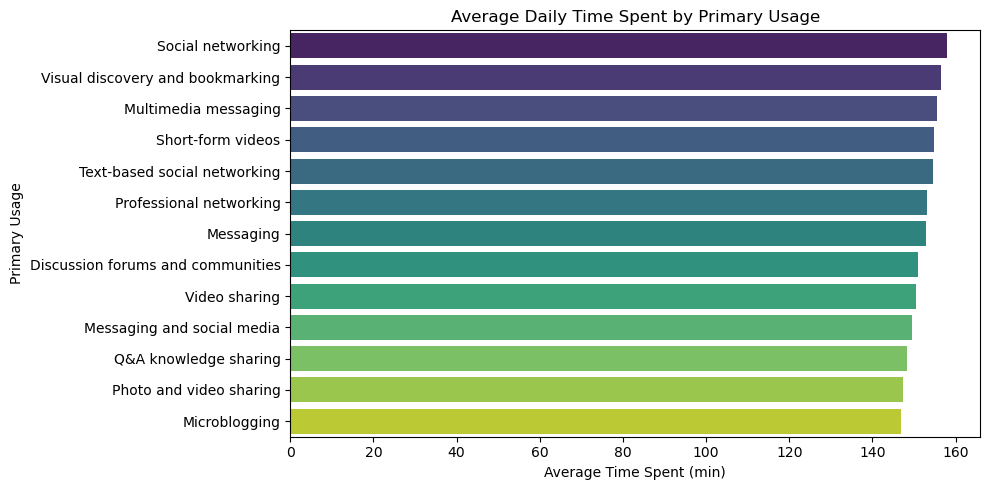

In [15]:
usage_avg_time = df.groupby("Primary Usage")["Daily Time Spent (min)"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=usage_avg_time.values, y=usage_avg_time.index, palette="viridis")
plt.title("Average Daily Time Spent by Primary Usage")
plt.xlabel("Average Time Spent (min)")
plt.ylabel("Primary Usage")
plt.tight_layout()
plt.show()

Distribution of Daily Time Spent by Primary Usage Type

C:\Users\Ahmed Eltras\AppData\Local\Temp\ipykernel_9588\691216899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Primary Usage", y="Daily Time Spent (min)", data=df, palette="Set3")


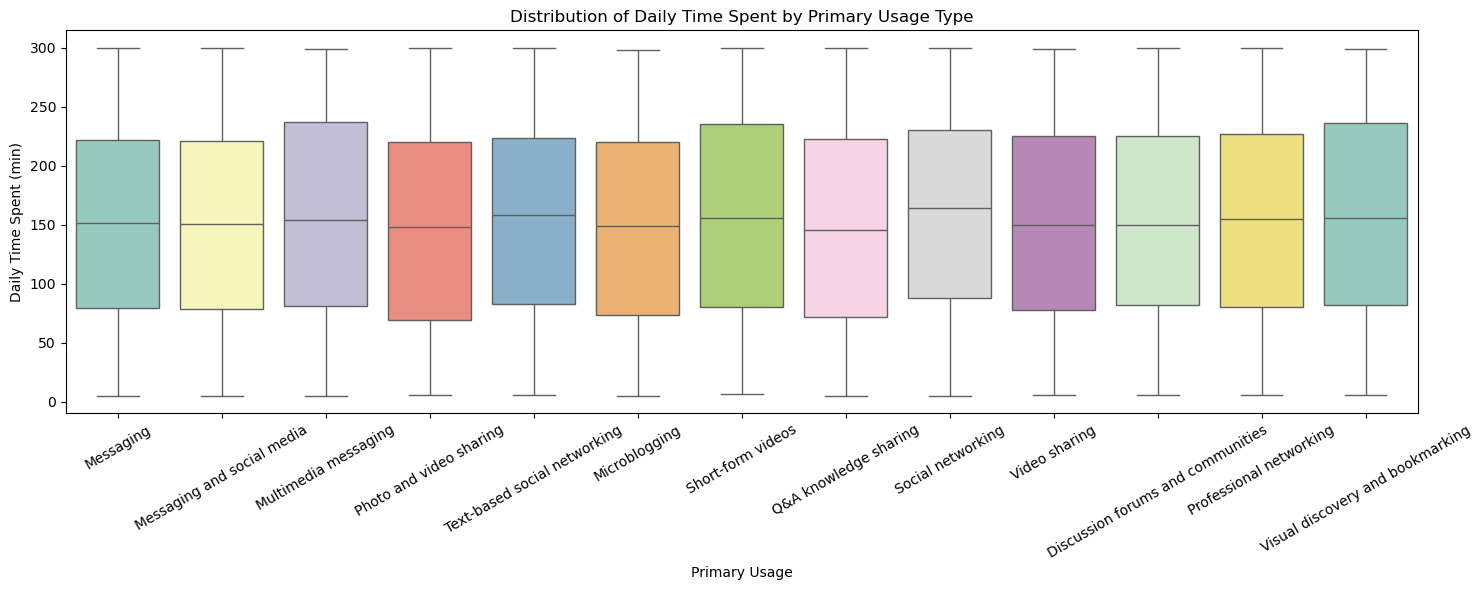

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(x="Primary Usage", y="Daily Time Spent (min)", data=df, palette="Set3")
plt.title("Distribution of Daily Time Spent by Primary Usage Type")
plt.xlabel("Primary Usage")
plt.ylabel("Daily Time Spent (min)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [18]:
df.to_csv("Social Media_Users.csv")